In [30]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
json_file = open('F:/Data_Analysis/loan_data_json.json')
data=json.load(json_file)

In [4]:
#transform to data frame
loandata = pd.DataFrame(data)

In [6]:
loandata.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
#finding unique values for the purpose column
loandata['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [9]:
#describing the data
loandata.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
#describibg the data for a specific column
loandata['int.rate'].describe()
loandata['fico'].describe()
loandata['dti'].describe()

count    9578.000000
mean       12.606679
std         6.883970
min         0.000000
25%         7.212500
50%        12.665000
75%        17.950000
max        29.960000
Name: dti, dtype: float64

In [15]:
#using EXP() to get the annual income
income = np.exp(loandata['log.annual.inc'])

In [16]:
loandata['annual_income'] = income

In [25]:
#FICO Score
length = len(loandata)
ficocat = []
for x in range(0,length):
    category = loandata['fico'][x]
    try:
        if category>=300 and category<400:
            cat= 'Very Poor'
        elif category>=400 and category<600:
            cat= 'Poor'
        elif category>=601 and category<660:
            cat= 'Fair'
        elif category>=660 and category<700:
            cat='Good'
        elif category>=700:
            cat='Excellent'
        else:
            cat='Unknown'
    except:
        cat='Unknown'
    ficocat.append(cat)

ficocat = pd.Series(ficocat)
loandata['fico.category'] = ficocat 

In [26]:
loandata.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,fico.category
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,Excellent
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,Excellent
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,Good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,Excellent
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,Good
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,147999.999594,Excellent
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,45000.000056,Good
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,59999.999928,Excellent
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,90000.000062,Good
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,26999.999865,Excellent


In [28]:
loandata.loc[loandata['int.rate']>0.12, 'int.rate.type'] = 'High'
loandata.loc[loandata['int.rate']<=0.12, 'int.rate.type'] = 'Low'

In [29]:
loandata.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,fico.category,int.rate.type
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,Excellent,Low
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,Excellent,Low
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,Good,High
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,Excellent,Low
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,Good,High


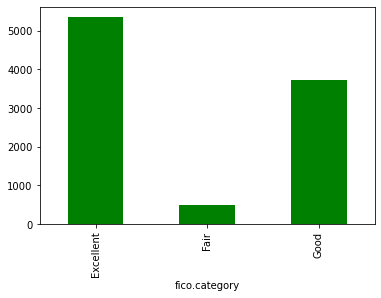

In [39]:
#number of loans/rows by fico.category
catplot = loandata.groupby(['fico.category']).size()
catplot.plot.bar(color='green', width=0.5)
plt.show()

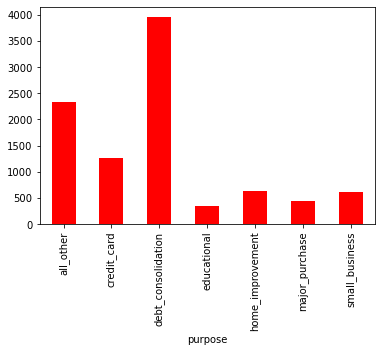

In [43]:
purposecount = loandata.groupby(['purpose']).size()
purposecount.plot.bar(color='red', width=0.5)
plt.show()

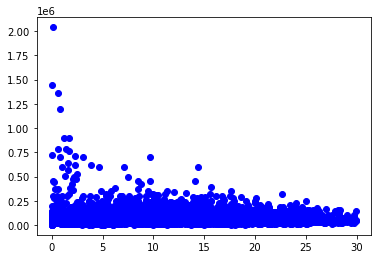

In [47]:
#scatter plots
ypoint = loandata['annual_income']
xpoint = loandata['dti']
plt.scatter(xpoint, ypoint, color='blue')
plt.show()

In [48]:
#writing to csv
loandata.to_csv('loan_cleaned.csv', index = True)